## Feature Selection

### Dataset : Pima Indians Diabetes Database

This dataset is taken originally from the National Institute of Diabetes, Digestive and Kidney Diseases.

Diabetes is one of the fastest growing chronic life threatening diseases that have already affected 422 million people worldwide according to the report of World Health Organization (WHO), in 2018. Due to the presence of a relatively long asymptomatic phase, early detection of diabetes is always desired for a clinically meaningful outcome. Around 50% of all people suffering from diabetes are undiagnosed because of its long-term asymptomatic phase.

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 

There are 768 observations and 8 independent variables in the dataset. The target variable indicates the test result of the patient. It is 1 when the test result is positive and 0 when the test result is negative. 

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

### Loading the dataset

In [2]:
location=("C:\\Users\\krishna meghana\\Downloads\\diabetes.csv")
data = pd.read_csv(location)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("The shape of the data is ",data.shape)

The shape of the data is  (768, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The diabetes dataset contains 768 rows and 9 features including the target variable in which all are numeric in nature. No categorical features exist. But there are some features which can be turned into categorical, like Glucose level, BMI, Age groups.

Outcome is the target variable which has values 0 and 1 indicating whether the patient has diabetes or not.

#### Description of the Attributes:

- Pregnancies --- Number of times pregnant
- Glucose --- The blood plasma glucose concentration after a 2 hour oral glucose tolerance test (mg/dL)
- BloodPressure --- Diastolic blood pressure (mm/Hg)
- SKinThickness --- Skinfold Triceps skin fold thickness (mm)
- Insulin --- 2 Hour serum insulin (mu U/ml)
- BMI --- Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction --- A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
- Age 
- Outcome --- Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no)

The dataset have nine attributes(parameters) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome)

### Checking for missing values

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### There are no missing values in the dataset but if we observe the dataset, we can see that lots of features have 0 values.

For example in BloodPressure, BMI, Glucose, Insulin etc having 0 for those features make no sense like having 0 bloodpressure or BMI etc.

It appears as if zero was used as a imputer value in original data for missing values. We can treat them as missing and impute with proper values.

It is better to replace zeros with NaN because counting them would be easier and need to be replaced with suitable values.

In [8]:
#Replacing zeroes with Nan value

data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans

print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We can see that the features Glucose, BloodPressure, SkinThickness, Insulin, BMI have missing values.

In [9]:
#For easy access, renaming data_copy as df
df=data_copy

### Distribution Plots

In [10]:
# set the background style of the plot
sns.set_style('whitegrid')

<AxesSubplot:xlabel='BMI', ylabel='Density'>

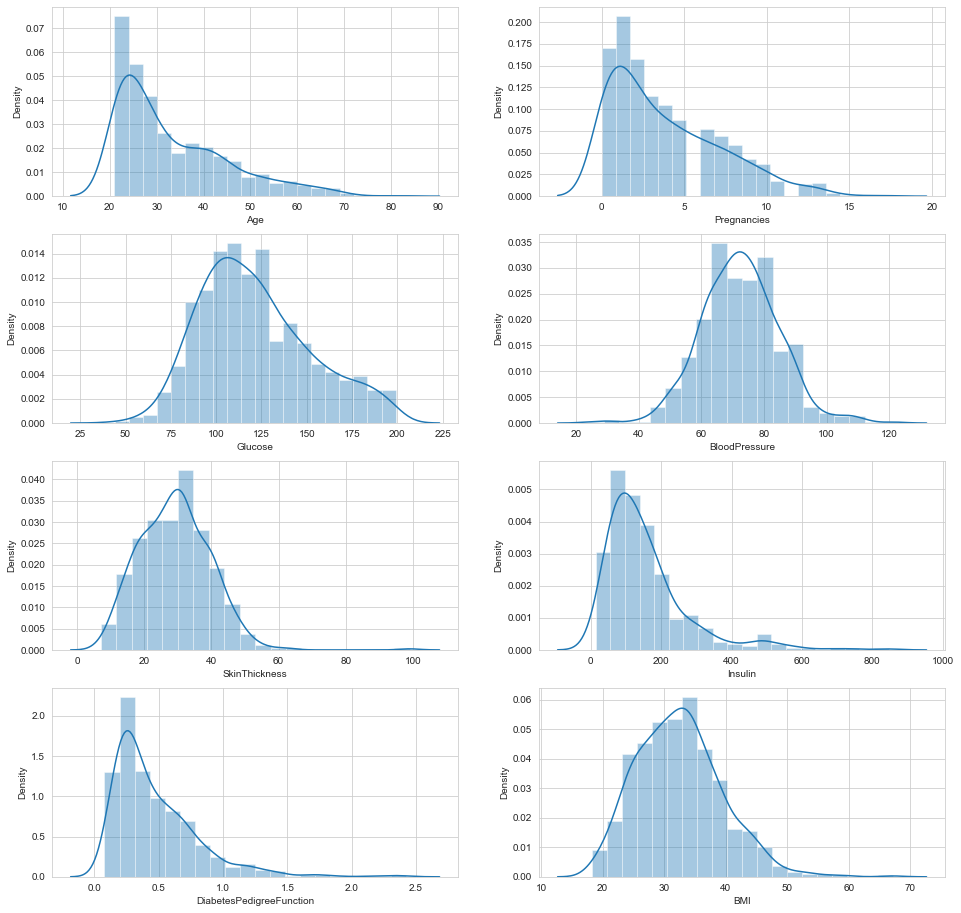

In [11]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

We can say the data is skewed to the right if mean is grater than the median value and vice versa. Such situation is significantly observed for Insulin. The data also seems to have some outliers which can be viewed using boxplot.

The plots show that Glucose, Blood Pressure, BMI are normally distributed. Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed.
The missing values can either be imputed with mean or median or any value or they can be deleted from the dataset for further analysis. Here, we are trying to replace them with mean and median values according to their distribution.

In [12]:
#Checking the skewness of data

df.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

For highly skewed values we'll impute the column with median else mean.

Glucose, BloodPressure, SkinThickness, Insulin, BMI are the columns with missing values.

In [13]:
# Highly skewed
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

#Normal
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


 Missing values have been handled.

### Checking for duplicate values

In [15]:
df.duplicated().sum()

0

There are no duplicate values in the data

### Multivariate Statistical Analysis

#### Pair Plot

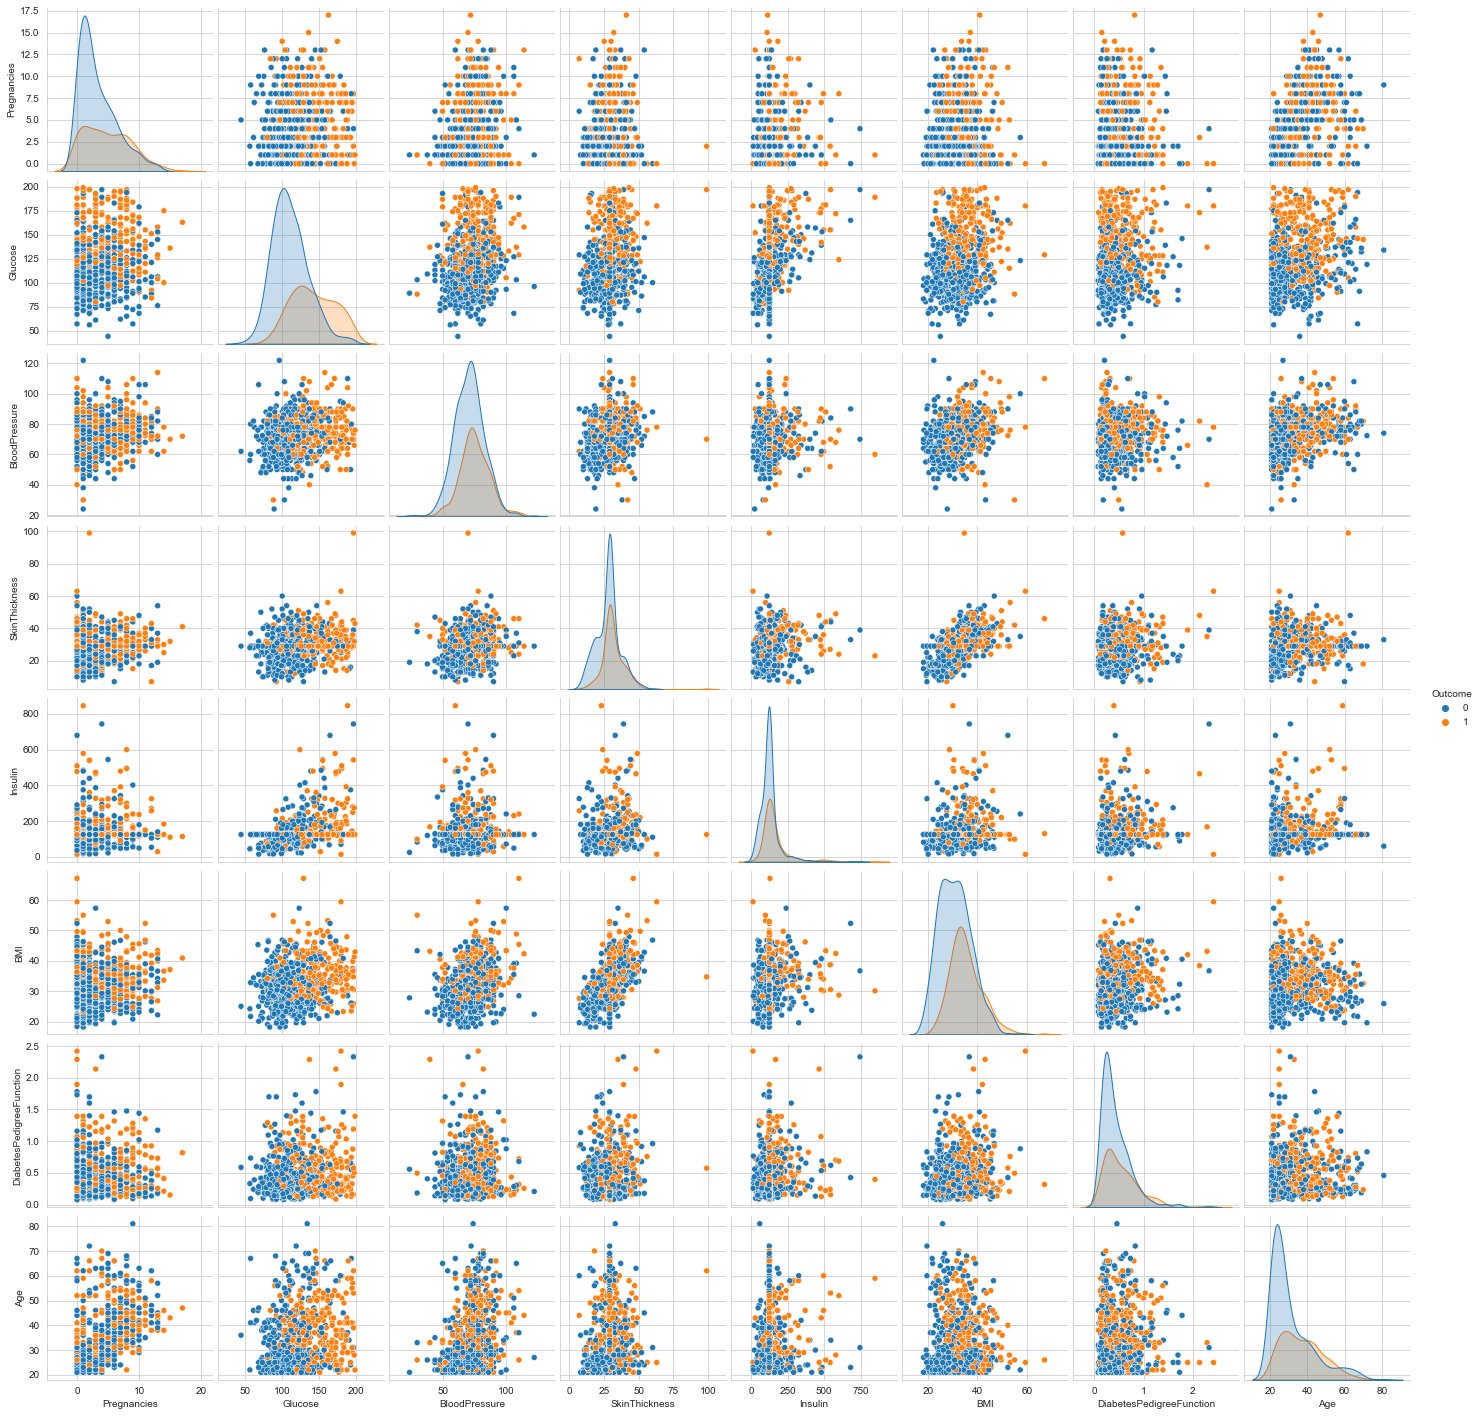

In [16]:
sns.pairplot(data=df,hue='Outcome',diag_kind='kde')
plt.show()

Pregnancies, Insulin, DiabeticPedigreeFunction and Age have skewed distribution. 

We know most of the machine learning models use the assumption of normality so these variables might need to be scaled, But we may consider the assumption to be true according Central Limit Theorem that if number of observation is large we can consider the distribution to be normal or bell shaped. Removing Outliers may also help us to achieve normal distribution of that variable.

It looks like Glucose, BP and BMI variables have some outliers.


#### Plot pairplot according to outcome

<Figure size 720x480 with 0 Axes>

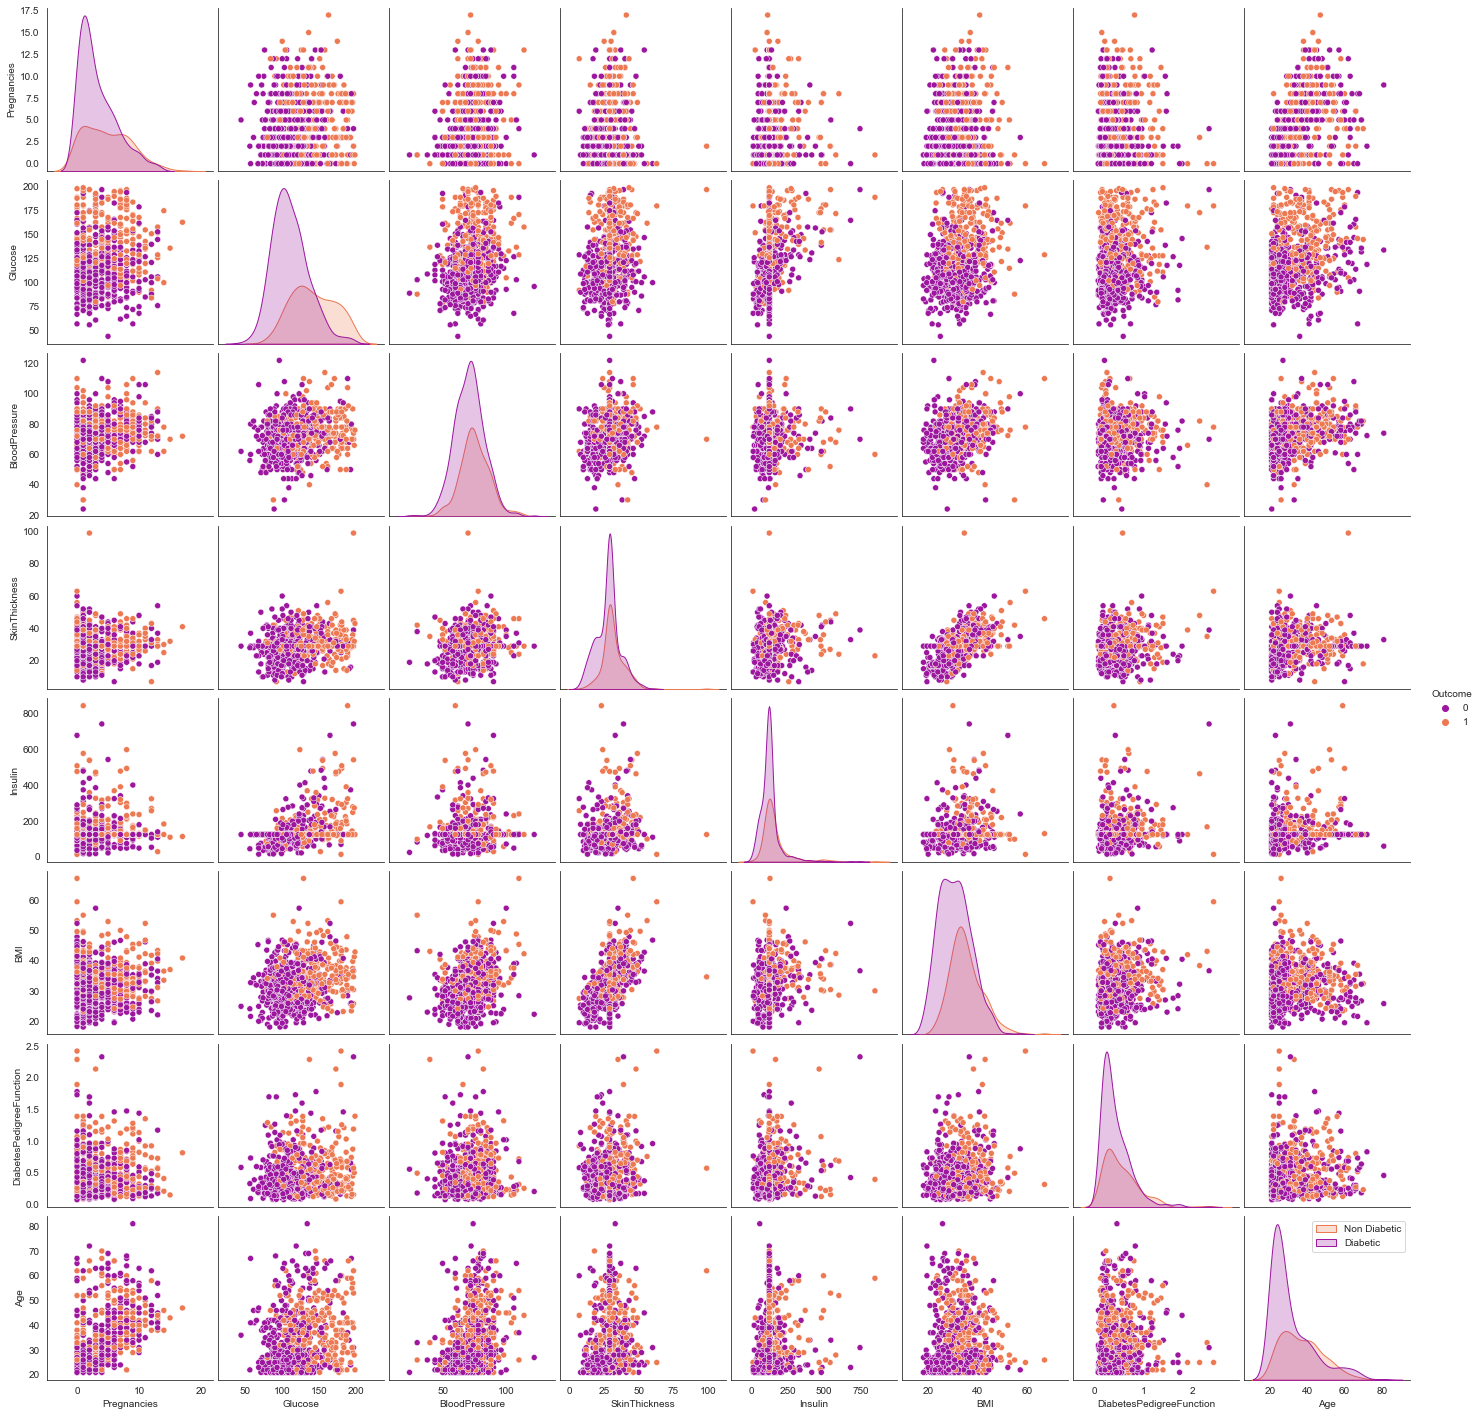

In [53]:
plt.figure(dpi = 120)
sns.pairplot(df,hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

We can clearly see that data points are not linearly seperable according to Outcome. 

Distribution of variables is normal. In some variables they are skewed to right due to Outliers. Treating Outliers may help to get rid of them. Because data points are spread non linear, Fitting tree based models might help us to get better accuracy.

### Feature Selection

1)A lot many features can affect the accuracy of the algorithm.

2)Feature Extraction means to select only the important features in-order to improve the accuracy of the algorithm.

3)It reduces training time and reduces overfitting

4)We can choose important features in 2 ways:

a)Correlation matrix--> selecting only the uncorrelated features.

b)RandomForestClassifier--> It gives the importance of the features

#### Plotting a correlation matrix to understand the relationship between variables.

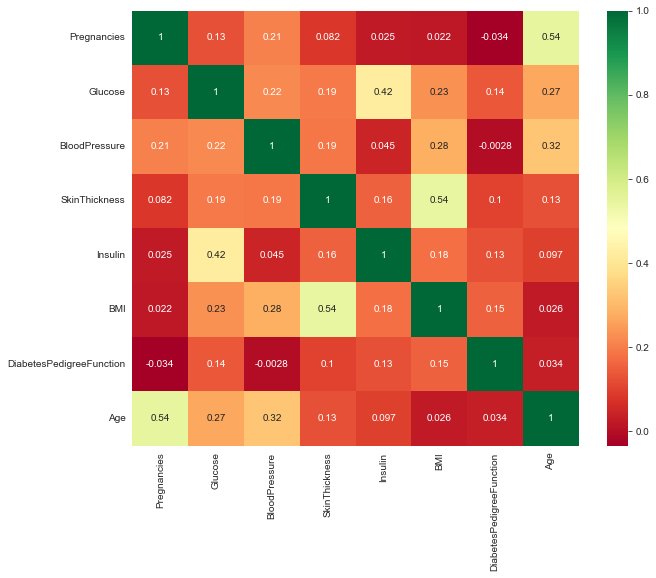

In [56]:
sns.heatmap(df[df.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- Glucose shows positive weak linear association with other variable in given dataset. That means On increasing Glucose level in patients, Other characteristics will also increase. 

- BloodPressure shows positive weak linear association with other variable in given dataset. That means On increasing BP level in patients, Other variables will also increase.

- SkinThickness shows positive weak linear association with other variable in given dataset ,(Except with Age). That means On increasing SkinThickness in patients, Other variables will also increase. SkinThickness with Age shows a weak negative correlation, that means on increasing SkinThickness , Age must decrease.

- Insulin shows positive weak linear association with other variable in given dataset ,(Except with Age). That means On increasing Insulin level in patients, Other variables will also increase. Insulin with Age shows a weak negative correlation, that means on increasing SkinThickness , Age must decrease.

- BMI shows positive weak linear association with other variable in given dataset. That means On increasing BMI level in patients, Other variables will also increase.

- DiabetesPedigreeFunction shows positive weak linear association with other variable in given dataset. That means On increasing DPF in patients, Other variables will also increase.


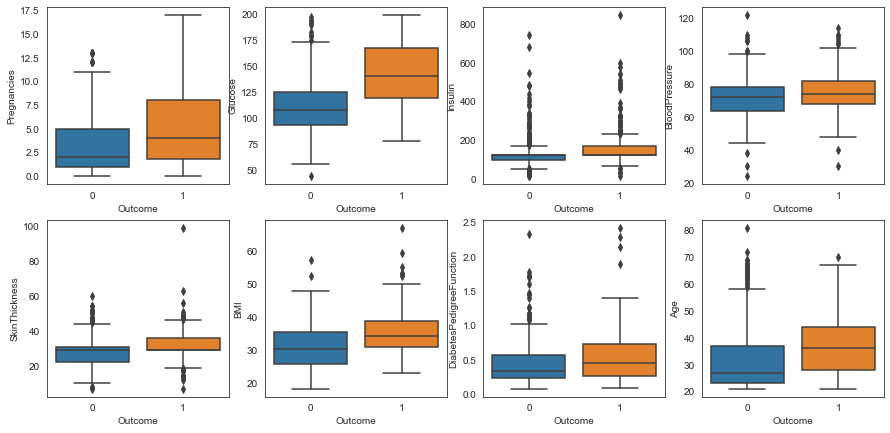

In [57]:
#box plot to visualize the skewness and outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose','Insulin', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df.Outcome,y = col, data = df)
plt.show()

In [55]:
df.corrwith(df['Outcome'],axis = 0).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
dtype: float64

It appears Insulin, DiabetesPedigreefunction and Blood Pressure have not much affect on the Outcome variable.

Also looking at the boxplots of all the variables, it can be observed that Insulin variable has many outliers. It may interfere with the modelling and give inaccurate results. It seems logical to remove this feature from the analysis.

#### Random Forest Classifier to understsand the feature importance

In [58]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=df[df.columns[:8]]
Y=df['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.249936
BMI                         0.167015
Age                         0.136222
DiabetesPedigreeFunction    0.116371
Insulin                     0.089548
BloodPressure               0.084363
Pregnancies                 0.082248
SkinThickness               0.074297
dtype: float64

It looks like the variables Glucose, BMI, Age, DiabetesPedigreeFunction are the important columns for analysis. 

In [59]:
#Selecting only the important variables

df2=df[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

#### Standardizing the data

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Standard Scaler: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

It is necessary to treat outliers if a distance-based algorithm (logistic regression, SVM, etc) is applied on the dataset. Outliers do not affect a tree-based algorithm. Since we will use both distance and tree-based algorithms, we will scale our data to treat outliers. We use Standard Scaler for the process. Standard Scaler transforms the feature by subtracting the mean and dividing with the standard deviation. This way the feature also gets close to standard normal distribution with mean 0.

In [60]:
from sklearn.preprocessing import StandardScaler #Standardisation
features=df[df.columns[:4]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
x['Outcome']=df['Outcome']
outcome=x['Outcome']

#Splitting the data into training and testing
train,test=train_test_split(x,test_size=0.20,random_state=0,stratify=x['Outcome'])
train_X=train[train.columns[:4]]
test_X=test[test.columns[:4]]
train_y=train['Outcome']
test_y=test['Outcome']